In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread, imshow
import tensorflow as tf
from tensorflow import keras

from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.image as mpimg
import glob
import os
import itertools
import shutil
import random
import warnings

# Read Data

### plot random images

In [4]:
IMG_WIDTH=145
IMG_HEIGHT=145
img_folder=r'/Users/sultanahaldawsari/Desktop/projects/flowers/rose'

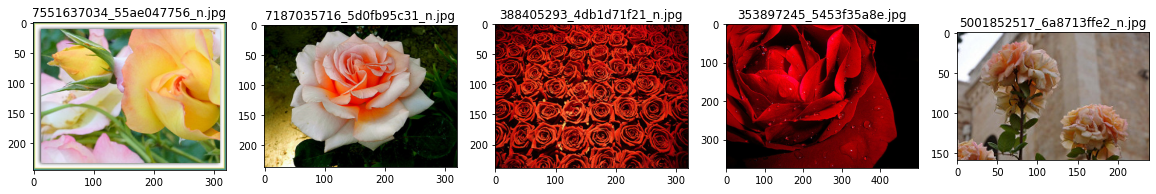

In [5]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [6]:
import cv2
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/Users/sultanahaldawsari/Desktop/projects/flowers')

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Data Preprocessing

In [8]:
X = img_data
y = class_name

In [9]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [12]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [13]:
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [15]:
print(f'The length of X test is {len(X_train)}')

The length of X test is 3021


### ImageDataGenerator is function for data augmentation

In [16]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [17]:
def display_examples(images):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images after preprocessing", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i], cmap=plt.cm.binary)
    plt.show()

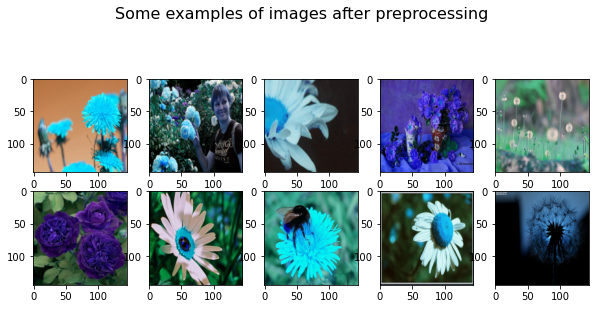

In [18]:
display_examples(X_train)

# CNN Building

In [23]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="LeakyReLU", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="LeakyReLU"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="LeakyReLU"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="LeakyReLU"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="LeakyReLU"))
model.add(Dense(5, activation="softmax"))

In [24]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 71, 71, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)      

In [27]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
95/95 [==============================] - 266s 3s/step - loss: 1.5991 - accuracy: 0.2493 - val_loss: 1.6042 - val_accuracy: 0.2245
Epoch 2/50
95/95 [==============================] - 253s 3s/step - loss: 1.5975 - accuracy: 0.2502 - val_loss: 1.5846 - val_accuracy: 0.2353
Epoch 3/50
95/95 [==============================] - 1461s 16s/step - loss: 1.5533 - accuracy: 0.2800 - val_loss: 1.4995 - val_accuracy: 0.3171
Epoch 4/50
95/95 [==============================] - 232s 2s/step - loss: 1.4680 - accuracy: 0.3496 - val_loss: 1.5766 - val_accuracy: 0.3187
Epoch 5/50
95/95 [==============================] - 260s 3s/step - loss: 1.4283 - accuracy: 0.3731 - val_loss: 1.4136 - val_accuracy: 0.3657
Epoch 6/50
95/95 [==============================] - 286s 3s/step - loss: 1.3612 - accuracy: 0.4184 - val_loss: 1.3650 - val_accuracy: 0.3981
Epoch 7/50
95/95 [==============================] - 306s 3s/step - loss: 1.3395 - accuracy: 0.4224 - val_loss: 1.3717 - val_accuracy: 0.3997
Epoch 8/50


In [28]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

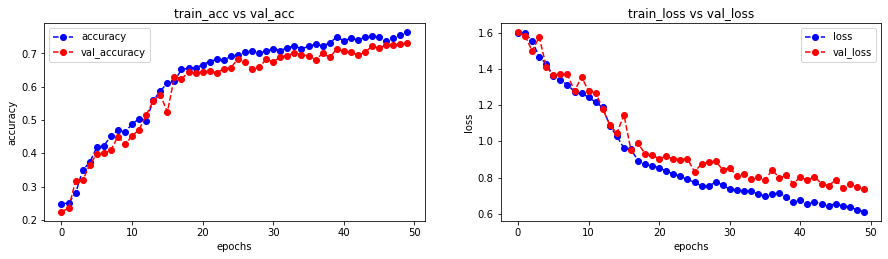

In [29]:
plot_accuracy_loss(history)

In [35]:
labels_new = ["daisy", "dandelion", "rose", "sunflower","tulip"]
IMG_SIZE = 145

In [30]:
prediction=np.argmax(model.predict(X_test), axis=-1)

In [36]:
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

       daisy       0.38      0.92      0.53       244
   dandelion       0.81      0.13      0.22       291
        rose       0.71      0.39      0.50       251
   sunflower       0.60      0.76      0.67       213
       tulip       0.69      0.58      0.63       297

    accuracy                           0.53      1296
   macro avg       0.64      0.55      0.51      1296
weighted avg       0.65      0.53      0.50      1296



<AxesSubplot:>

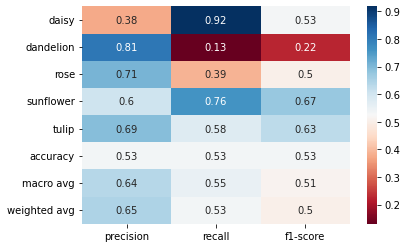

In [38]:
#plot classification report
clf_report = classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='RdBu')

In [40]:
model.save("flowers.h5")